In [1]:
from rbibm.utils.utils_data import query, query_main, remove_entry_by_id, query_rob_metric, get_model_by_idx
from rbibm.plots.multi_plots import multi_plot
from rbibm.plots.metric_plots import plot_by_num_simulations, plot_expected_coverage, plot_approximation_metric, plot_rob_tolerance_plot
from rbibm.plots.sweep_plots import plot_mulitobjective_paretto_front
from rbibm.plots.main_plots import plot_posterior, plot_adversarial_posterior, plot_posterior_predictive, plot_adversarial_posterior_predictive
from rbibm.plots.styles import use_style

import matplotlib.pyplot as plt 

import torch 
import numpy as np

In [2]:
base_fig_size = 1.75

In [3]:
torch.manual_seed(0)

In [4]:
np.random.seed(0)

In [5]:
name="benchmark"
idxs_final = []
id1 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.001, N_train=100000, model_name="maf", task="gaussian_linear")
id2 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.1, N_train=100000, model_name="maf", task="sir")
id3 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.01, N_train=100000, model_name="maf", task="lotka_volterra")
id4 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=100., N_train=100000, model_name="maf", task="hudgkin_huxley")
id5 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.01, N_train=100000, model_name="maf", task="vae_task")
id6 = query_main(name, defense = "FIMTraceRegularizer", params_defense_beta=0.1, N_train=100000, model_name="maf", task="spatial_sir")
idxs_final.extend([id1.id.iloc[0],id2.id.iloc[0],id3.id.iloc[0],id4.id.iloc[0],id5.id.iloc[0],id6.id.iloc[0]])

In [6]:
colors = ["#08519c", "#d94801"]

Following data row is used:
Id: 3c286911-3508-436d-977f-4b828e53427c, Task: lotka_volterra, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =d6389b3d-064a-4e21-9b9c-3109665481b8, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_426812/2526355610.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("lotka_volterra_predicitive.svg", bbox="tight", transparent=True)


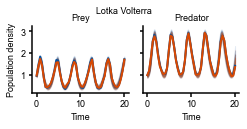

In [7]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior_predictive(name, task="lotka_volterra", 
                                                      model_name="maf", eps=2., idx_adv_example=0, N_train=100000, 
                                                      id=idxs_final, metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", 
                                                      plotting_kwargs={"colors": colors, "markersize": 2., "lw":2., "figsize":(base_fig_size*2,base_fig_size)})
    fig.suptitle("Lotka Volterra")
    fig.savefig("lotka_volterra_predicitive.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: 3c286911-3508-436d-977f-4b828e53427c, Task: lotka_volterra, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =d6389b3d-064a-4e21-9b9c-3109665481b8, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/mnt/qb/work/macke/mgloeckler90/miniconda3/envs/rbi_camera_ready/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525551200/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/tmp/ipykernel_426812/476173722.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("lotka_volterra_posterior.svg", bbox="tight", transparent=True)


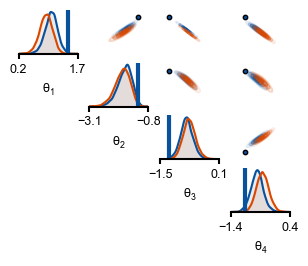

In [8]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="lotka_volterra", model_name="maf", eps=2., idx_adv_example=0, id=idxs_final,
                                           N_train=100000, n_samples=10000, metric_rob="ReverseKLRobMetric",attack="L2PGDAttack",
                                           plotting_kwargs={"colors":colors, "bins": 100,"labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$",r"$\theta_4$"], "figsize":(2*base_fig_size, 1.5*base_fig_size)})
    fig.savefig("lotka_volterra_posterior.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: 890093b5-7fd6-41de-bb46-6dcd1dc180f0, Task: sir, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =be7c231f-8f78-42ac-a079-9038718d81b2, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_426812/3984441201.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("sir_predictive.svg", bbox="tight", transparent=True)


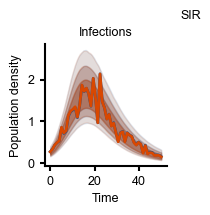

In [9]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior_predictive(name, task="sir", model_name="maf", eps=0.2,id=idxs_final, idx_adv_example=0, N_train=100000, metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", plotting_kwargs={"colors": colors, "all_states":False, "figsize": (0.9*base_fig_size,0.9*base_fig_size)})
    fig.suptitle("SIR", y=1.1, x=1.05)
    fig.savefig("sir_predictive.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: 890093b5-7fd6-41de-bb46-6dcd1dc180f0, Task: sir, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =be7c231f-8f78-42ac-a079-9038718d81b2, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_426812/3108058566.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("sir_posterior.svg", bbox="tight", transparent=True)


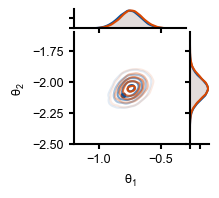

In [10]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="sir", model_name="maf", eps=0.2, idx_adv_example=0, N_train=100000, id=idxs_final,
    metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", n_samples=50000, type="2djointplot", 
    plotting_kwargs={"bins":200, "figsize":(base_fig_size,base_fig_size), "colors": colors, "labels":[r"$\theta_1$", r"$\theta_2$"]})
    fig.savefig("sir_posterior.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: 1605bde5-fe55-4873-b056-9ead55ba7d36, Task: vae_task, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =97567689-8dbb-4a79-9487-d4e0efd028d2, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_426812/2566776227.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("vae_predictive.svg", bbox="tight", transparent=True)


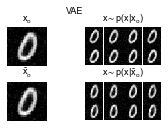

In [11]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior_predictive(name, task="vae_task", model_name="maf", eps=2., id=idxs_final,
    idx_adv_example=2, N_train=100000, metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", 
    plotting_kwargs={"n_samples":8, "nrow":4,"titles":[[r"$x_o$", r"$x \sim p(x|x_o)$"], [r"$\tilde{x}_o$",r"$x \sim p(x|\tilde{x}_o)$"]], "figsize":(2*base_fig_size, base_fig_size), "grid_spec_width_ratios": (1,1), "grid_padding": 1})
    fig.suptitle("VAE")
    plt.subplots_adjust(wspace=-.3, hspace=.4)
    fig.savefig("vae_predictive.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: 1605bde5-fe55-4873-b056-9ead55ba7d36, Task: vae_task, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =97567689-8dbb-4a79-9487-d4e0efd028d2, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_426812/929124894.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("vae_posterior.svg", bbox="tight", transparent=True)


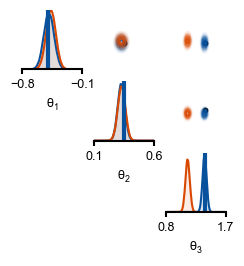

In [12]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="vae_task", model_name="maf", eps=2., id=idxs_final,
                                           idx_adv_example=2, N_train=100000, n_samples=100000, 
                                           metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", 
                                           plotting_kwargs={"colors":colors, "bins": 100, "figsize": (1.5*base_fig_size, 1.5*base_fig_size),"labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$"]})
    fig.savefig("vae_posterior.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: d2bcda0d-3731-40b4-9e88-508d20fff830, Task: spatial_sir, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =f186ab9f-d096-462d-a09c-8c25fc9a95e1, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_426812/2777018660.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("spatial_sir_predictive.svg", bbox="tight", transparent=True)


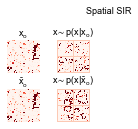

In [13]:
with use_style("pyloric"):
    torch.manual_seed(3)
    fig, axes = plot_adversarial_posterior_predictive(name, task="spatial_sir", model_name="maf", eps=2., id=idxs_final,
                                                      idx_adv_example=2, N_train=100000, metric_rob="ReverseKLRobMetric", 
                                                      attack="L2PGDAttack",
                                                      plotting_kwargs={"n_samples":4, "grid_pad_value":0.2, "grid_padding":2, "pad_label":0, "grid_spec_width_ratios": (1,1), "nrow":2, "figsize":(1.2*base_fig_size,0.9*base_fig_size), "titles":[[r"$x_o$", r"$x \sim p(x|x_o)$"], [r"$\tilde{x}_o$",r"$x \sim p(x|\tilde{x}_o)$"]]})
    plt.subplots_adjust(hspace=0.5, wspace=-0.4)
    fig.suptitle("Spatial SIR", y=1.1, x=0.9)
    fig.savefig("spatial_sir_predictive.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: d2bcda0d-3731-40b4-9e88-508d20fff830, Task: spatial_sir, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =f186ab9f-d096-462d-a09c-8c25fc9a95e1, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_426812/1819361710.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("spatial_sir_posterior.svg", bbox="tight", transparent=True)


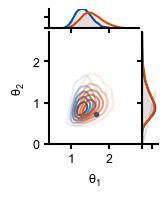

In [14]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="spatial_sir", model_name="maf", eps=2., idx_adv_example=2, id=idxs_final,
                                           N_train=100000, 
                                           metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", 
                                           n_samples=10000, type="2djointplot", 
                                           plotting_kwargs={"bins":200, "colors": colors, "labels":[r"$\theta_1$", r"$\theta_2$"], "figsize":(base_fig_size*0.8, base_fig_size)})
    fig.savefig("spatial_sir_posterior.svg", bbox="tight", transparent=True)
    plt.show()

In [15]:
torch.manual_seed(1)

Following data row is used:
Id: f8298167-427e-47c9-a7d3-2d198acbcdea, Task: hudgkin_huxley, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =1b7d81ae-29e9-48f1-a2b8-fb44592329db, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_426812/2124398702.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("hh_predictive.svg", bbox="tight", transparent=True)


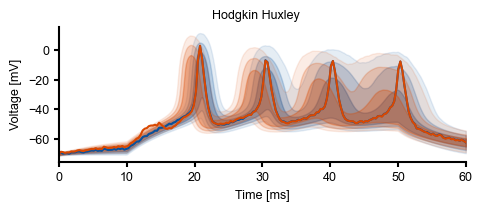

In [16]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior_predictive(name, task="hudgkin_huxley", 
                                                      model_name="maf", eps=1., idx_adv_example=108, N_train=100000, id=idxs_final,
                                                      metric_rob="ReverseKLRobMetric", attack="L2PGDAttack",
                                                      plotting_kwargs={"colors":colors,"samples_to_plot":0, "lw":1.5, "n_samples": 100000, "figsize":(3*base_fig_size, base_fig_size)})
    fig.suptitle("Hodgkin Huxley")
    fig.savefig("hh_predictive.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: f8298167-427e-47c9-a7d3-2d198acbcdea, Task: hudgkin_huxley, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =1b7d81ae-29e9-48f1-a2b8-fb44592329db, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_426812/3660968941.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("hh_posterior.svg", bbox="tight", transparent=True)


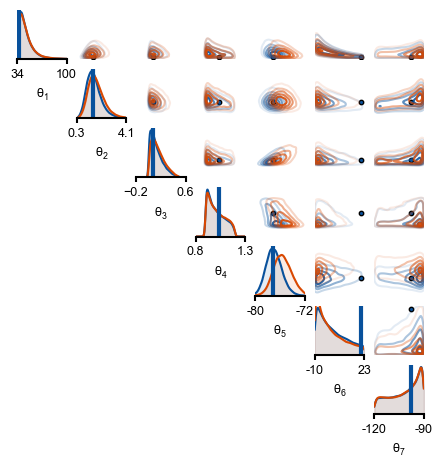

In [17]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="hudgkin_huxley", model_name="maf", eps=1., idx_adv_example=108,id=idxs_final,
    N_train=100000, n_samples=50000, metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", 
    plotting_kwargs={"colors":colors, "figsize":(3*base_fig_size,3*base_fig_size), "bins":100,"labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$",r"$\theta_4$",r"$\theta_5$",r"$\theta_6$",r"$\theta_7$"], "jitter":1e-2})
    axes[0,0].set_xticklabels([34,100])
    axes[4,4].set_xticklabels([-80,-72])
    axes[5,5].set_xticklabels([-10,23])
    axes[6,6].set_xticklabels([-120,-90])
    fig.savefig("hh_posterior.svg", bbox="tight", transparent=True)
    plt.show()